In [ ]:
!pip install mnist


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mnist
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

%matplotlib inline

1. Используйте метод главных компонент для набора данных MNIST (данные загрузите из keras.datasets, train dataset объема 60000). Определите, какое минимальное количество главных компонент  необходимо использовать, чтобы доля объясненной дисперсии превышала 0.84 (была строго больше указанного значения).

Введите количество главных компонент :

In [ ]:
print(28*28)

784


Количество главных компонент 56 


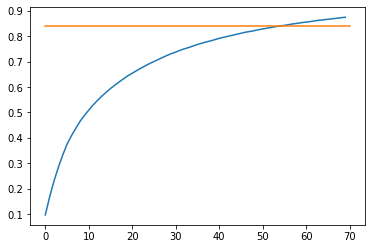

In [ ]:
X_train = mnist.train_images()
y_train = mnist.train_labels()
dim = 784
X_train = X_train.reshape(len(X_train), dim)
ev_ = 0.84
M = 0
pca = PCA(n_components=70, svd_solver='full')
pca.fit(X_train)
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_), 3)
for i, ev in enumerate(explained_variance):
  if ev > ev_:
    M = i +1
    break

plt.plot(np.arange(70), explained_variance)
plt.plot([0, 70], [0.84, 0.84]);
print(f'Количество главных компонент {M} ')

2. Найдите счеты, отвечающие найденным в предыдущем пункте  главным компонентам: PCA(n_components=M, svd_solver='full').

3. Разделите полученную выборку (после сокращения размерности) случайным образом в отношении 70/30: train_test_split(X_train, y_train, test_size=0.3, random_state=95).

4. Используя метод многоклассовой классификации One-vs-All OneVsRestClassifier(), обучите алгоритм случайного леса RandomForestClassifier() с параметрами criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=95. Выполните оценку с помощью тестовых данных.

Введите количество верно классифицированных объектов класса 4 для тестовых данных:

In [ ]:
pca = PCA(n_components=M, svd_solver='full')
pca.fit(X_train)
X_test_transformed = pca.transform(X_train)
X_train, X_test, y_train, y_test = train_test_split(X_test_transformed, y_train, test_size=0.3, random_state=95)


In [ ]:
rfc = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=95)
clf = OneVsRestClassifier(rfc).fit(X_train, y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 4
print(f'Выведите количество верно классифицированных объектов класса {P}: {CM[P][P]}')

Выведите количество верно классифицированных объектов класса 4: 1603


##

5. Используя метод многоклассовой классификации One-vs-All OneVsRestClassifier(), обучите алгоритм логистической регрессии LogisticRegression(solver='lbfgs', random_state=95). Остальные параметры оставьте по умолчанию. Выполните оценку с помощью тестовых данных.

Введите количество верно классифицированных объектов класса 6 для тестовых данных:

In [ ]:
reg = LogisticRegression(solver='lbfgs', random_state=95)
clf = OneVsRestClassifier(rfc).fit(X_train, y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 6
print(f'Выведите количество верно классифицированных объектов класса {P}: {CM[P][P]}')

Выведите количество верно классифицированных объектов класса 6: 1720


 Используя метод многоклассовой классификации One-vs-All OneVsRestClassifier(), обучите дерево принятия решений DecisionTreeClassifier() с параметрами criterion='gini', min_samples_leaf=10, max_depth=20, random_state=95. Выполните оценку с помощью тестовых данных.

Введите количество верно классифицированных объектов класса 7 для тестовых данных:

In [ ]:
from sklearn import tree
reg = tree.DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, random_state=95)
clf = OneVsRestClassifier(rfc).fit(X_train, y_train)
y_pred = clf.predict(X_test)
CM = confusion_matrix(y_test, y_pred)
P = 7
print(f'Выведите количество верно классифицированных объектов класса {P}: {CM[P][P]}')

Выведите количество верно классифицированных объектов класса 7: 1794
